In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 
import geopandas as gpd

In [2]:
%config InlineBackend.print_figure_kwargs = {'dpi': 110, 'bbox_inches': 'tight'}

In [3]:
gebiete = gpd.read_file("MunichModel_shape/Gebiete.shp")
abschnitte = gpd.read_file("MunichModel_shape/Abschnitte.shp")
knoten = gpd.read_file("MunichModel_shape/Knoten.shp")

In [4]:
knoten["clear_name"] = ["Schmidbartlangerstr.", 
                  "Schenkendorfstr.", 
                  "Botanischer\nGarten", 
                  "Gräfelfinger\nStr.", #3
                  "Am\nLangwieder\nBach", #4
                  "Neue\nMessstelle 2", 
                  "WWT Gut Großlappen", 
                  "Gyßlinger Becken", #7
                  "Neue\nMessstelle 1", 
                  "WWT Gut Marienhof", #9
                  "Gesamt",
                  "Leopoldstr.", #11
                  "Neue\nMessstelle 4", 
                  "Zulauf\nGut Großlappen", 
                  "Savitstr.",
                  "Wintersteinstr.", ]

knoten["name"] = knoten.clear_name.apply(lambda x: manhole_clear_names[x])

/tmp/ipykernel_11341/2688582535.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


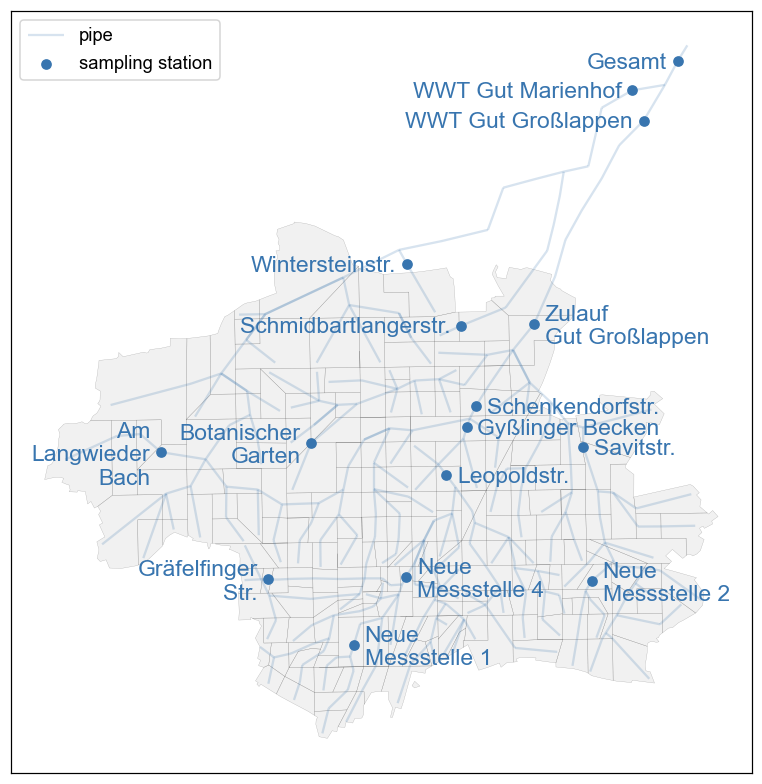

In [5]:
fig, ax = plt.subplots(figsize=(10,9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
abschnitte.plot(ax=ax, color=blue, label='pipe', alpha=0.2)
knoten.plot(ax=ax, color=blue, label='sampling station')

txt_color = blue

# orientation left of point
for idx, row in knoten.iloc[[0,6,9,10,15]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color)

# orientation right of point
for idx, row in knoten.iloc[[1,7,11, 14]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color)

# left three rows
for idx, row in knoten.iloc[[4]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -21), ha="right", textcoords="offset points", color=txt_color)

# left two rows
for idx, row in knoten.iloc[[2,3]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -13), ha="right", textcoords="offset points", color=txt_color)

# right two rows
for idx, row in knoten.iloc[[5,8,12,13]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -13), textcoords="offset points", color=txt_color)


ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set

plt.legend()
plt.savefig("../plots/overview_maps/MunichModel_clearname.png", dpi=300, bbox_inches='tight')

In [6]:
knoten

,geometry,clear_name,name
0,POINT Z (692289.509 5342748.497 504.2),Schmidbartlangerstr.,N_Ub
1,POINT Z (692868.418 5339520.149 516.3),Schenkendorfstr.,S_M4
2,POINT Z (686255.746 5338038.467 524.6),Botanischer\nGarten,C_U
3,POINT Z (684534.741 5332563.932 543),Gräfelfinger\nStr.,S_Ua
4,POINT Z (680234.302 5337668.352 535),Am\nLangwieder\nBach,N_Uc
5,POINT Z (697521.89 5332513.56 536),Neue\nMessstelle 2,E_U
6,POINT Z (699601.505 5350974.465 504),WWT Gut Großlappen,SCE_D2
7,POINT Z (692499.805 5338677.075 518),Gyßlinger Becken,S_M3
8,POINT Z (687969.274 5329935.082 558),Neue\nMessstelle 1,S_Ub
9,POINT Z (699130.206 5352181.794 500),WWT Gut Marienhof,N_D


/tmp/ipykernel_11341/1686906527.py:33: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


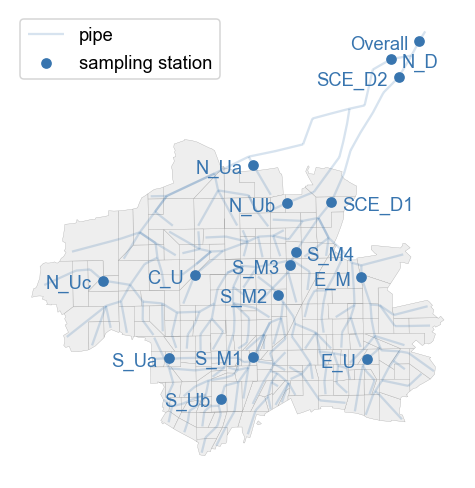

In [11]:
fig, ax = plt.subplots(figsize=(7*cm,7*cm), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color=very_light_grey, edgecolor=medium_grey, linewidth=0.2, label='Gebiete')
abschnitte.plot(ax=ax, color=blue, label='pipe', alpha=0.2)
knoten.plot(ax=ax, color=blue, label='sampling station')

txt_color = blue

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,10,11,12,14,15]].iterrows():
    ax.annotate(
        text=row['name'],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(-7, -5),
        textcoords="offset points",
        ha="right",
        color=txt_color,
        fontsize=0.8*15  # Change this value to your desired font size
    )

# orientation right of point
for idx, row in knoten.iloc[[1,9,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color, fontsize=0.8*15)  # Change this value to your desired font size)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()  # Remove plot borders

plt.legend()
plt.savefig("../plots/overview_maps/MunichModel.png", dpi=300, bbox_inches='tight')


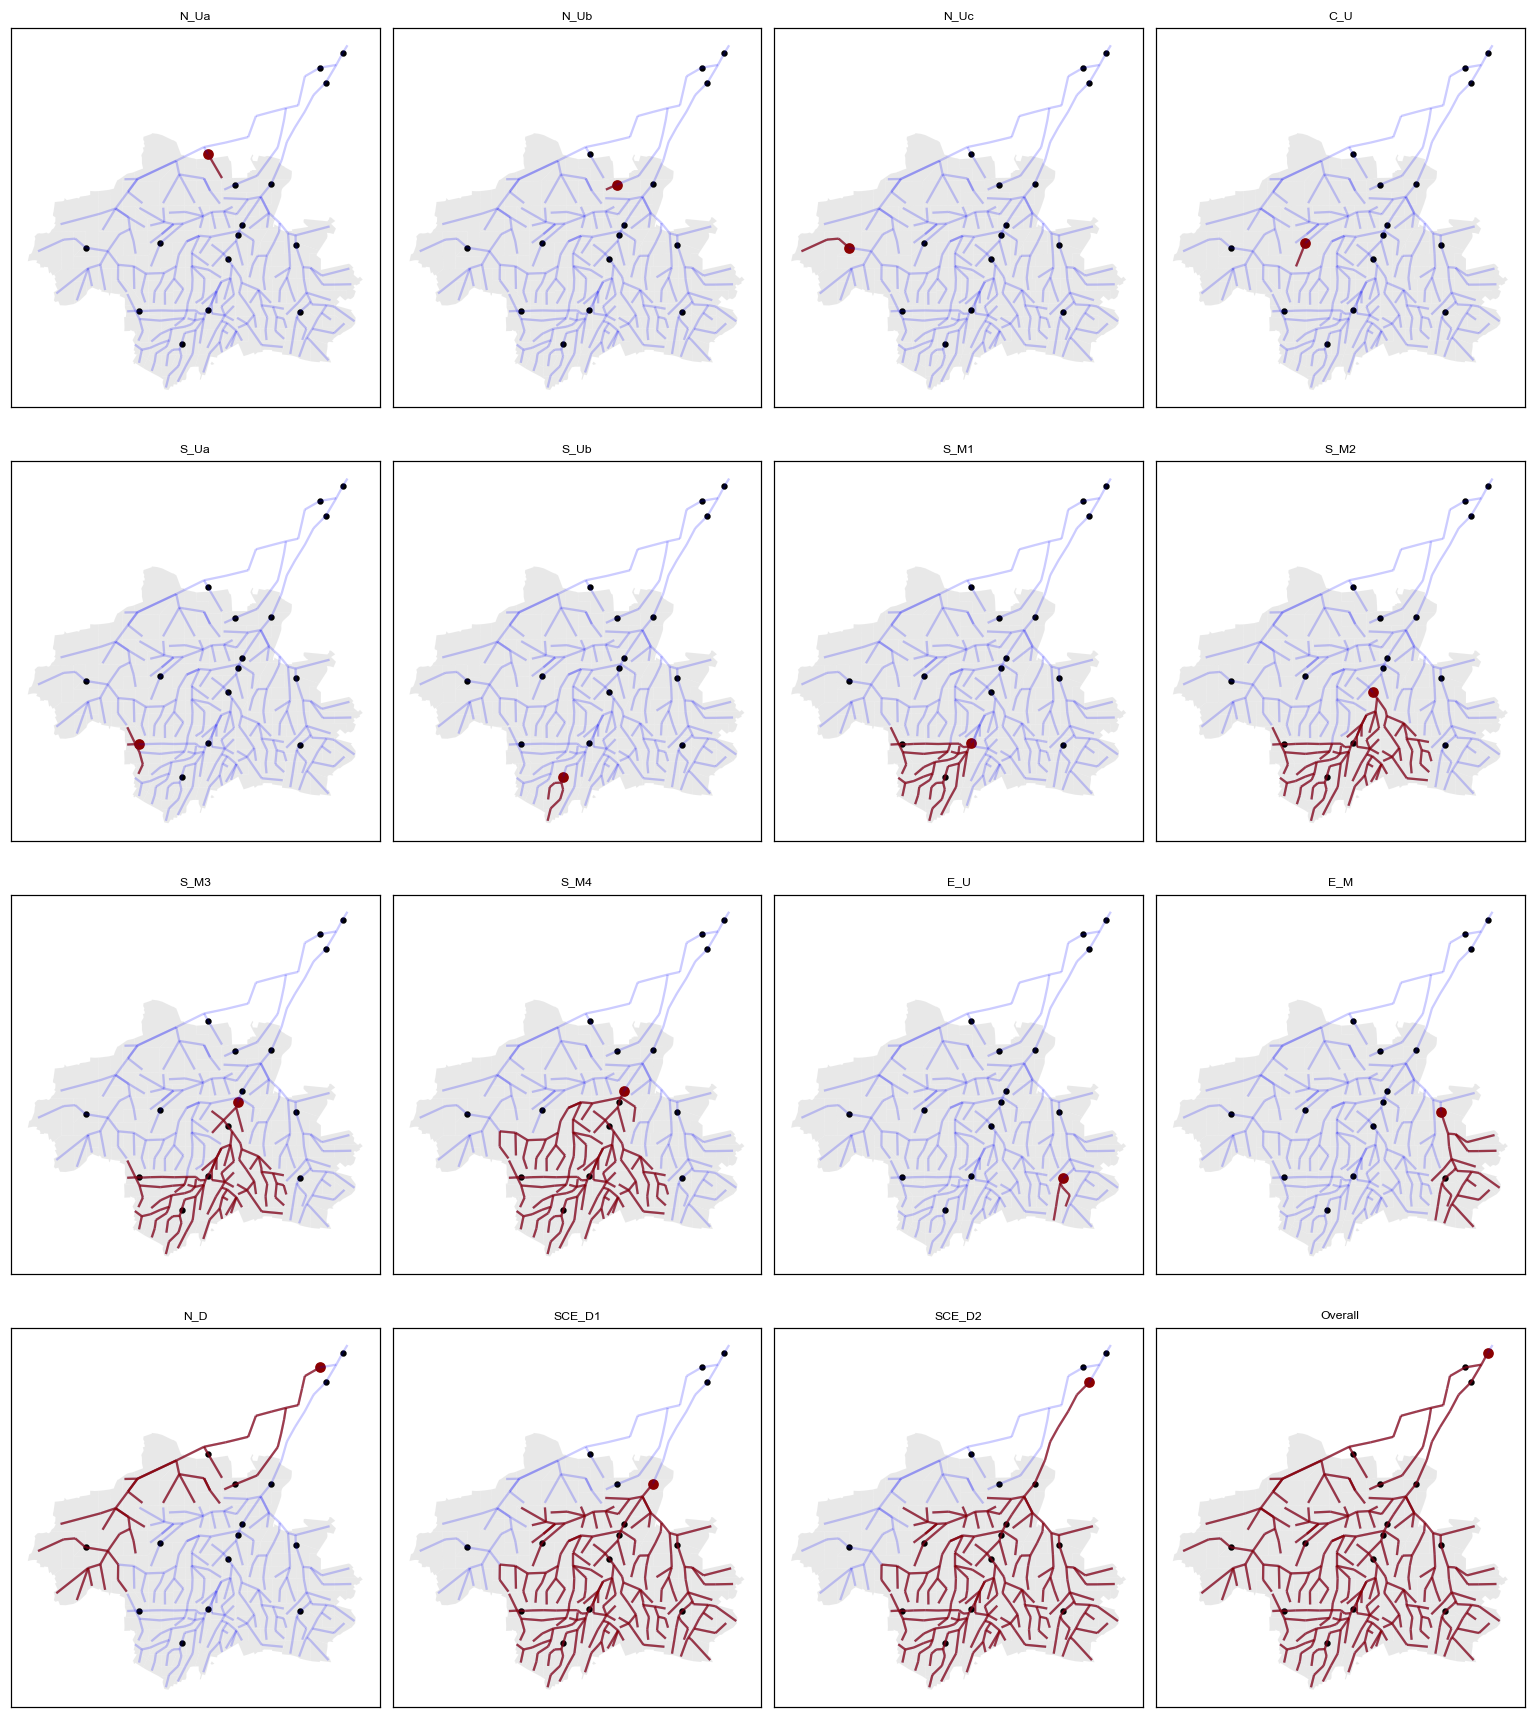

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(14, 16), dpi=300)
axes = axes.flatten()  

locations_sorted = manhole_clear_names.keys()

for idx, station_name in enumerate(locations_sorted):

    clean_station_name = station_name.replace("\n", " ").replace(".", "")

    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/Upstream_Abschnitte/{clean_station_name}/Abschnitte.shp")

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor=None, alpha=0.5)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2)
    knoten.plot(ax=ax, color='black', markersize=10)

    knoten.loc[knoten['clear_name'] == list(locations_sorted)[idx]].plot(ax=ax, color='darkred')

    highlight_abschnitt.plot(ax=ax, color='darkred', alpha=0.7)

    # Titles, clean axes
    ax.set_title(manhole_clear_names[station_name])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("../plots/overview_maps/overview_upstream.png", dpi=300, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(14, 16), dpi=300)
axes = axes.flatten()  

locations_sorted = manhole_clear_names.keys()

for idx, station_name in enumerate(locations_sorted):

    clean_station_name = station_name.replace("\n", " ").replace(".", "")

    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/Upstream_Abschnitte/{clean_station_name}/Abschnitte.shp")

    # Find gebiete that touch any of the highlight_abschnitt geometries
    touching_gebiete = gebiete[gebiete.geometry.intersects(highlight_abschnitt.unary_union)]

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor=None, alpha=0.5)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2)
    knoten.plot(ax=ax, color='black', markersize=10)

    knoten.loc[knoten['clear_name'] == list(locations_sorted)[idx]].plot(ax=ax, color='darkred')

    highlight_abschnitt.plot(ax=ax, color='darkred', alpha=0.7)

    # Plot the touching gebiete with a different color
    touching_gebiete.plot(ax=ax, color='orange', alpha=0.5)

    # Titles, clean axes
    ax.set_title(manhole_clear_names[station_name])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("../plots/overview_maps/overview_upstream_hightlight_gebiete.png", dpi=300, bbox_inches='tight')


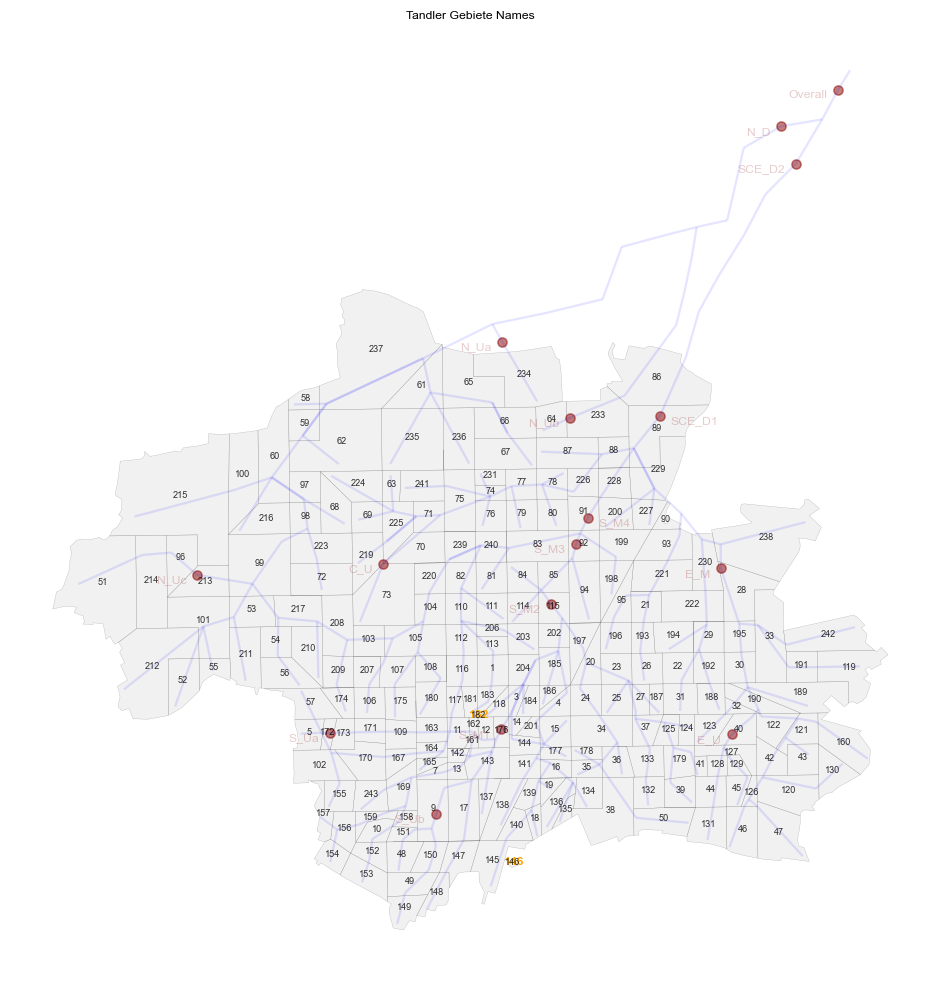

In [39]:
fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
knoten.plot(ax=ax, color='darkred', label='sampling station', alpha=0.5)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.1)

# Annotate each Gebiet with its name at the centroid
for idx, row in gebiete.iterrows():
    centroid = row.geometry.centroid
    name = row['Name']  
    # Highlight gebiete
    if str(row['Name']) in [str(x) for x in [0, 2, 6, 166, 8, 168, 232, 205, 146, 182, 218]]:
        ax.annotate(
            text=name,
            xy=(centroid.x, centroid.y),
            ha='center',
            fontsize=8,
            color='orange',
            fontweight='bold',
            alpha=1.0
        )
    ax.annotate(
        text=name,
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=6,
        color='black',
        alpha=0.8
    )


txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color, alpha=0.2)

# orientation right of point
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color, alpha=0.2)

# Optional: improve layout
ax.set_axis_off()
ax.set_title("Tandler Gebiete Names")

plt.tight_layout()

plt.show()

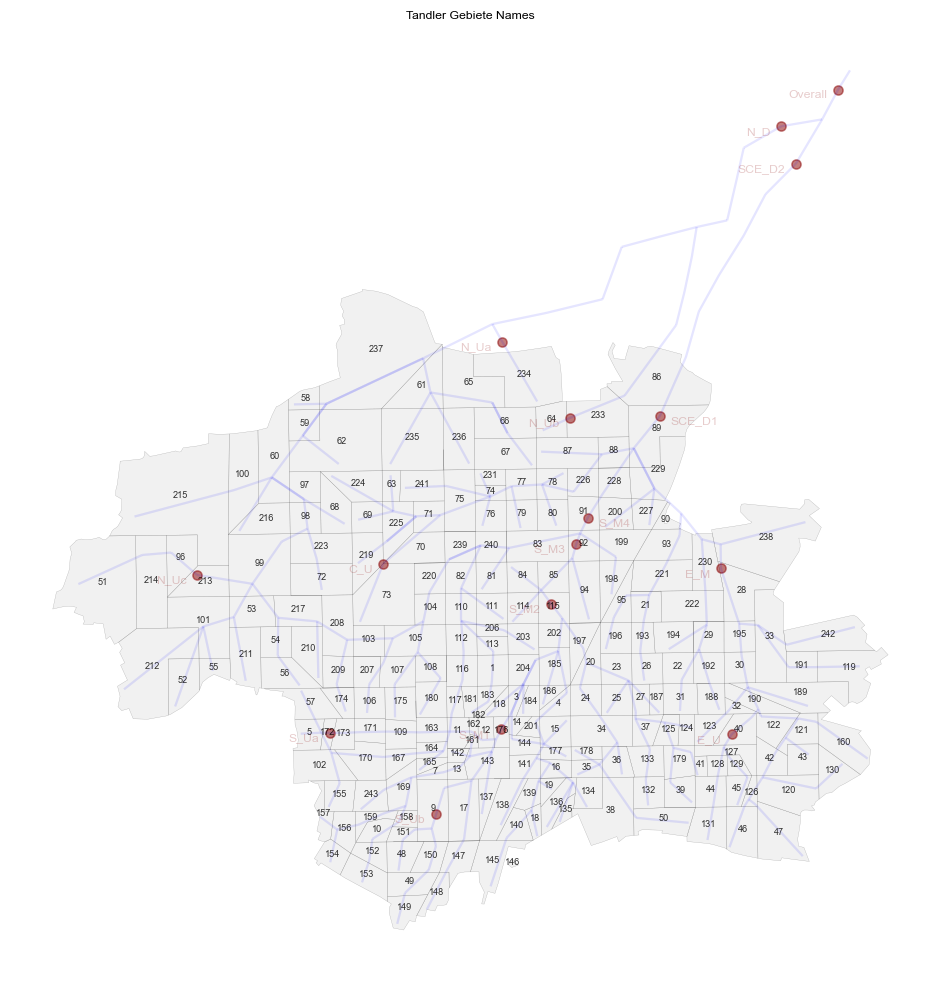

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
knoten.plot(ax=ax, color='darkred', label='sampling station', alpha=0.5)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.1)

# Annotate each Gebiet with its name at the centroid
for idx, row in gebiete.iterrows():
    centroid = row.geometry.centroid
    name = row['Name']  # or 'gebiet_name', depending on your column name
    ax.annotate(
        text=name,
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=6,
        color='black',
        alpha=0.8
    )


txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color, alpha=0.2)

# orientation right of point
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color, alpha=0.2)

# Optional: improve layout
ax.set_axis_off()
ax.set_title("Tandler Gebiete Names")

plt.tight_layout()

plt.savefig("../plots/overview_maps/overview_gebiete_names.png", dpi=300, bbox_inches='tight')
plt.show()


## Nati's Skript

In [13]:
gebiete = gpd.read_file("MunichModel_shape/Export_Shape_250527/Gebiete.shp")
abschnitte = gpd.read_file("MunichModel_shape/Export_Shape_250527/Abschnitte.shp")
knoten = gpd.read_file("MunichModel_shape/Knoten.shp")

In [14]:
knoten["clear_name"] = ["Schmidbartlangerstr.", 
                  "Schenkendorfstr.", 
                  "Botanischer\nGarten", 
                  "Gräfelfinger\nStr.", #3
                  "Am\nLangwieder\nBach", #4
                  "Neue\nMessstelle 2", 
                  "WWT Gut Großlappen", 
                  "Gyßlinger Becken", #7
                  "Neue\nMessstelle 1", 
                  "WWT Gut Marienhof", #9
                  "Gesamt",
                  "Leopoldstr.", #11
                  "Neue\nMessstelle 4", 
                  "Zulauf\nGut Großlappen", 
                  "Savitstr.",
                  "Wintersteinstr.", ]

knoten["name"] = knoten.clear_name.apply(lambda x: manhole_clear_names[x])

In [15]:
knoten["ezg_name"] = ["Schmidbartlangerstrasse",
                      "Schenkendorfstrasse",
                      "Menzinger_Strasse",
                      "Graefelfinger_Strasse",
                      "Am_Langwieder_Bach",
                      "M2", 
                      "GutGrosslappen",
                      "Gysslinger_Becken",
                      "M1", 
                      "Gut_Marienhof",
                      "Gesamt",
                      "Leopoldstrasse",
                      "M4",
                      "GutGrosslappen",
                      "Savitstrasse",
                      "Wintersteinstrasse"]

In [16]:
knoten["upstream_areas"] = knoten.name.apply(lambda x: manhole_upstream_ordering[x])

In [17]:
knoten

,geometry,clear_name,name,ezg_name,upstream_areas
0,POINT Z (692289.509 5342748.497 504.2),Schmidbartlangerstr.,N_Ub,Schmidbartlangerstrasse,[N_Ub]
1,POINT Z (692868.418 5339520.149 516.3),Schenkendorfstr.,S_M4,Schenkendorfstrasse,"[S_M4, S_M3, S_M2, S_M1, S_Ua, S_Ub]"
2,POINT Z (686255.746 5338038.467 524.6),Botanischer\nGarten,C_U,Menzinger_Strasse,[C_U]
3,POINT Z (684534.741 5332563.932 543),Gräfelfinger\nStr.,S_Ua,Graefelfinger_Strasse,[S_Ua]
4,POINT Z (680234.302 5337668.352 535),Am\nLangwieder\nBach,N_Uc,Am_Langwieder_Bach,[N_Uc]
5,POINT Z (697521.89 5332513.56 536),Neue\nMessstelle 2,E_U,M2,[E_U]
6,POINT Z (699601.505 5350974.465 504),WWT Gut Großlappen,SCE_D2,GutGrosslappen,"[SCE_D1, S_M4, S_M3, S_M2, S_M1, S_Ua, S_Ub, E..."
7,POINT Z (692499.805 5338677.075 518),Gyßlinger Becken,S_M3,Gysslinger_Becken,"[S_M3, S_M2, S_M1, S_Ua, S_Ub]"
8,POINT Z (687969.274 5329935.082 558),Neue\nMessstelle 1,S_Ub,M1,[S_Ub]
9,POINT Z (699130.206 5352181.794 500),WWT Gut Marienhof,N_D,Gut_Marienhof,"[N_D, N_Ua, N_Ub, N_Uc]"


In [18]:
tandler_upstream_gebiete = {}

for clear_name in knoten.clear_name.unique():
    upstream_manhole_names = knoten.loc[knoten["clear_name"]==clear_name, "upstream_areas"].iloc[0]
    highlight_gebiete = gebiete.loc[gebiete.EZG.isin(knoten.loc[knoten["name"].isin(upstream_manhole_names), "ezg_name"])]
    tandler_upstream_gebiete[knoten.loc[knoten["clear_name"]==clear_name, "name"].iloc[0]] = highlight_gebiete.Name.unique().tolist()


In [26]:
import json

In [29]:
with open("../../preprocessing/preprocessed_data/tandler_upstream_gebiete.json", "w") as f:
    json.dump(tandler_upstream_gebiete, f)

In [17]:
gebiete

,Name,Rechtswert,Hochwert,EZG,geometry
0,19,691763.566509923,5330636.55501866,Leopoldstrasse,"POLYGON ((691354.222 5330166.659, 691352.726 5..."
1,77,690715.371921702,5341094.43375074,GutGrosslappen,"POLYGON ((691215.141 5341100.526, 691227.879 5..."
2,3,690754.011296618,5333590.67986703,Leopoldstrasse,"POLYGON ((690555.879 5333087.984, 690317.456 5..."
3,146,690515.759196417,5328245.93682091,Gesamt,"POLYGON ((690409.007 5328207.925, 690305.376 5..."
4,104,687780.487728277,5336055.94929926,Schenkendorfstrasse,"POLYGON ((687280.733 5336049.856, 687267.995 5..."
...,...,...,...,...,...
230,153,686270.912644347,5327186.39677027,M4,"POLYGON ((686146.968 5327265.789, 685520.899 5..."
231,148,688376.565480544,5327532.35525407,M4,"POLYGON ((688364.677 5327512.569, 688367.736 5..."
232,193,694981.447529455,5336143.40403304,GutGrosslappen,"POLYGON ((694981.458 5336143.404, 695049.298 5..."
233,98,684237.606950812,5339514.65172254,Gut_Marienhof,"POLYGON ((684243.993 5339014.462, 683244.497 5..."


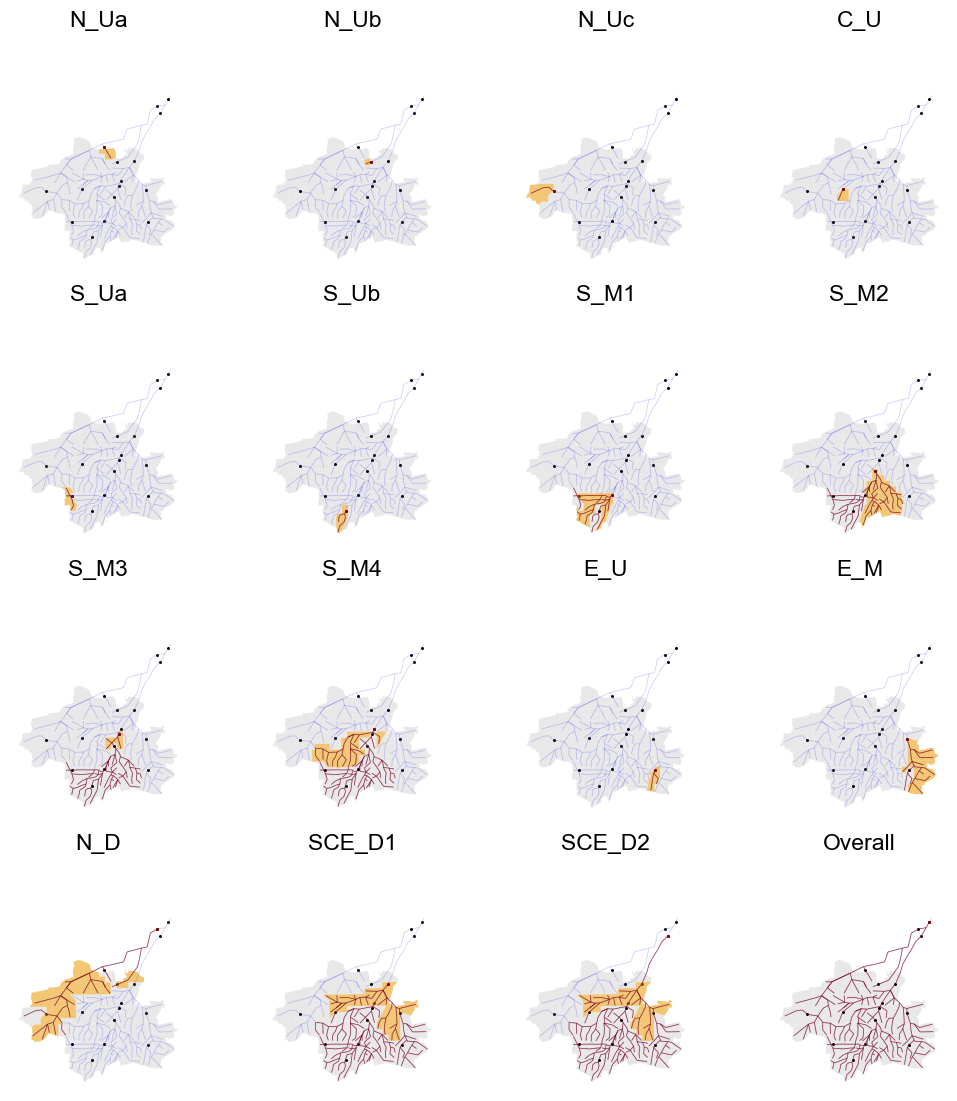

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(12*cm, 13*cm), dpi=300)
axes = axes.flatten()  

locations_sorted = manhole_clear_names.keys()

for idx, station_name in enumerate(locations_sorted):

    clean_station_name = station_name.replace("\n", " ").replace(".", "")

    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/Upstream_Abschnitte/{clean_station_name}/Abschnitte.shp")

    # Find gebiete that touch any of the highlight_abschnitt geometries
    highlight_gebiete = gebiete.loc[gebiete.EZG == knoten.loc[knoten["clear_name"]==station_name, "ezg_name"].iloc[0]]

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor=None, alpha=0.5)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2, linewidth=0.5)
    knoten.plot(ax=ax, color='black', markersize=0.9)

    # Plot the touching gebiete with a different color
    highlight_gebiete.plot(ax=ax, color='orange', alpha=0.5)
    highlight_abschnitt.plot(ax=ax, color='darkred', alpha=0.7, linewidth=0.5)
    knoten.loc[knoten['clear_name'] == list(locations_sorted)[idx]].plot(ax=ax, color='darkred', markersize=1)

    # Titles, clean axes
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()  # Remove plot borders

    # Move the title further down into the plot
    ax.set_title(manhole_clear_names[station_name], pad=40)

plt.tight_layout()
plt.savefig("../plots/overview_maps/direkteinzugsgebiete.png", dpi=300, bbox_inches='tight')


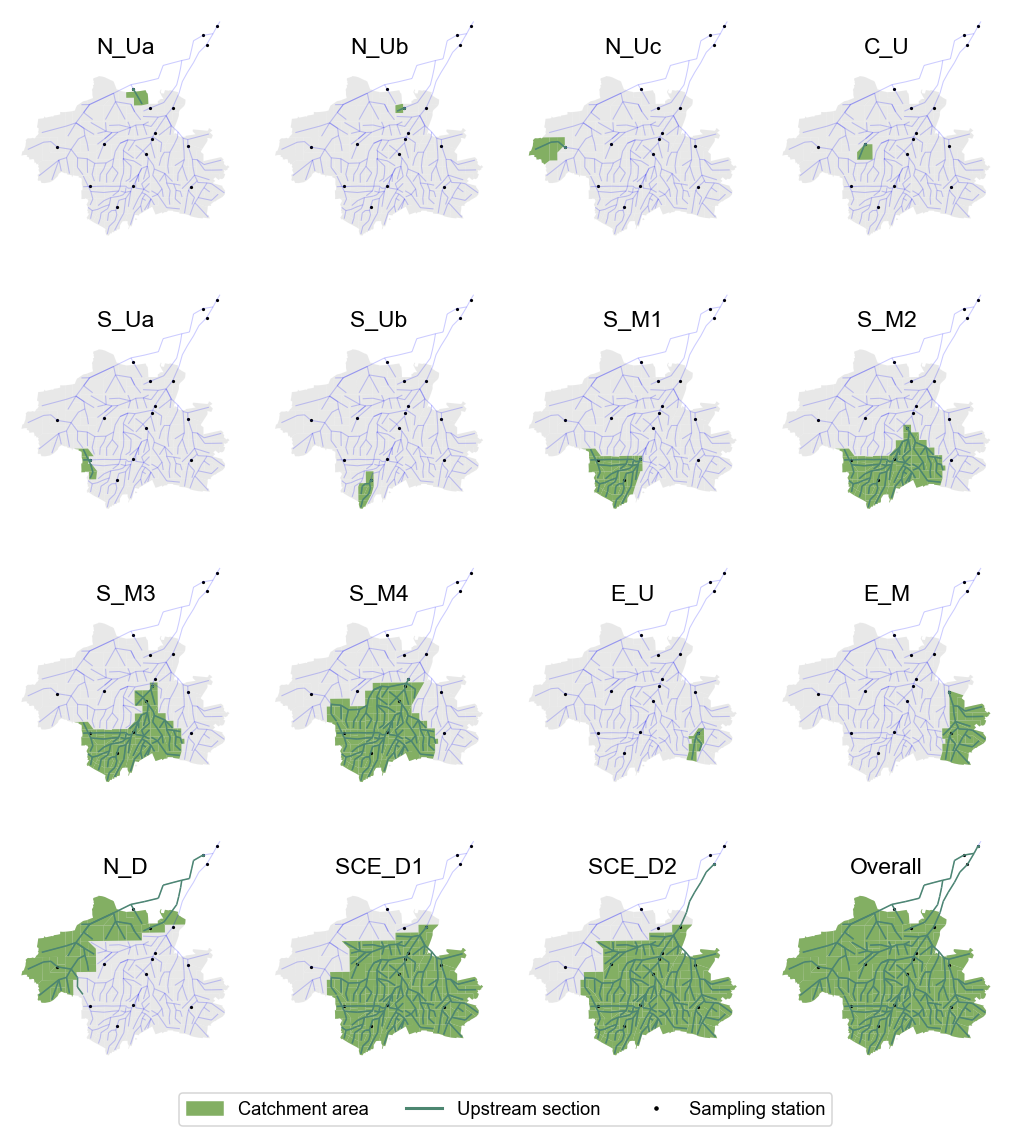

In [21]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, axes = plt.subplots(4, 4, figsize=(12*cm, 13*cm), dpi=300)
axes = axes.flatten()  

locations_sorted = manhole_clear_names.keys()

for idx, station_name in enumerate(locations_sorted):

    clean_station_name = station_name.replace("\n", " ").replace(".", "")

    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/Upstream_Abschnitte/{clean_station_name}/Abschnitte.shp")

    # Find gebiete that touch any of the highlight_abschnitt geometries
    upstream_manhole_names = knoten.loc[knoten["clear_name"]==station_name, "upstream_areas"].iloc[0]
    highlight_gebiete = gebiete.loc[gebiete.EZG.isin(knoten.loc[knoten["name"].isin(upstream_manhole_names), "ezg_name"])]
    #highlight_gebiete = gebiete.loc[gebiete.EZG == knoten.loc[knoten["clear_name"]==station_name, "ezg_name"].iloc[0]]

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor=None, alpha=0.5)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2, linewidth=0.7)
    highlight_gebiete.plot(ax=ax, color=green)
    knoten.plot(ax=ax, color='black', markersize=1.2)

    # Plot the touching gebiete with a different color
    highlight_abschnitt.plot(ax=ax, color=teal, alpha=1, linewidth=1)
    knoten.loc[knoten['clear_name'] == list(locations_sorted)[idx]].plot(ax=ax, color=teal, markersize=1)

    # Titles, clean axes
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_axis_off()  # Remove plot borders

    # Move the title further down into the plot
    # Add annotation at the top middle of each subplot
    ax.annotate(
        manhole_clear_names[station_name],
        xy=(0.5, 0.8),
        xycoords='axes fraction',
        ha='center',
        va='bottom',
    )

# Add a single legend for the whole figure below the plot
legend_elements = [
    Patch(facecolor=green, edgecolor=green, label='Catchment area'),
    Line2D([0], [0], color=teal, lw=2, label='Upstream section'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=4, label='Sampling station')
]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=3)

plt.tight_layout()
plt.savefig("../plots/overview_maps/overview_upstream_hightlight_gebiete.png",bbox_inches='tight')
